In [1]:
import math
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from collections import Counter
from sklearn.impute import SimpleImputer
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\GothamTikyani\Downloads\great_customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 13599 non-null  int64  
 1   age                     13178 non-null  float64
 2   workclass               13056 non-null  object 
 3   salary                  13177 non-null  float64
 4   education_rank          13599 non-null  int64  
 5   marital-status          13599 non-null  object 
 6   occupation              13056 non-null  object 
 7   race                    13599 non-null  object 
 8   sex                     13599 non-null  object 
 9   mins_beerdrinking_year  13175 non-null  float64
 10  mins_exercising_year    13178 non-null  float64
 11  works_hours             13599 non-null  int64  
 12  tea_per_year            11170 non-null  float64
 13  coffee_per_year         11188 non-null  float64
 14  great_customer_class    13599 non-null

In [3]:
## Data Cleaning

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

user_id                      0
age                        421
workclass                  543
salary                     422
education_rank               0
marital-status               0
occupation                 543
race                         0
sex                          0
mins_beerdrinking_year     424
mins_exercising_year       421
works_hours                  0
tea_per_year              2429
coffee_per_year           2411
great_customer_class         0
dtype: int64


In [5]:

#Missing values imputed using SimpleImputer
num_imputer = SimpleImputer(strategy='median')
df[['age', 'salary', 'mins_beerdrinking_year', 'mins_exercising_year', 'tea_per_year', 'coffee_per_year']] = num_imputer.fit_transform(df[['age', 'salary', 'mins_beerdrinking_year', 'mins_exercising_year', 'tea_per_year', 'coffee_per_year']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[['workclass', 'occupation']] = cat_imputer.fit_transform(df[['workclass', 'occupation']])


# Ensure correct data types
df['user_id'] = df['user_id'].astype(int)
df['education_rank'] = df['education_rank'].astype(int)
df['great_customer_class'] = df['great_customer_class'].astype(int)
df['works_hours'] = df['works_hours'].astype(int)

# Display cleaned DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 13599 non-null  int32  
 1   age                     13599 non-null  float64
 2   workclass               13599 non-null  object 
 3   salary                  13599 non-null  float64
 4   education_rank          13599 non-null  int32  
 5   marital-status          13599 non-null  object 
 6   occupation              13599 non-null  object 
 7   race                    13599 non-null  object 
 8   sex                     13599 non-null  object 
 9   mins_beerdrinking_year  13599 non-null  float64
 10  mins_exercising_year    13599 non-null  float64
 11  works_hours             13599 non-null  int32  
 12  tea_per_year            13599 non-null  float64
 13  coffee_per_year         13599 non-null  float64
 14  great_customer_class    13599 non-null

In [6]:
##Checking for clean data
new_missing_values = df.isnull().sum()
print(new_missing_values)

user_id                   0
age                       0
workclass                 0
salary                    0
education_rank            0
marital-status            0
occupation                0
race                      0
sex                       0
mins_beerdrinking_year    0
mins_exercising_year      0
works_hours               0
tea_per_year              0
coffee_per_year           0
great_customer_class      0
dtype: int64


<Axes: >

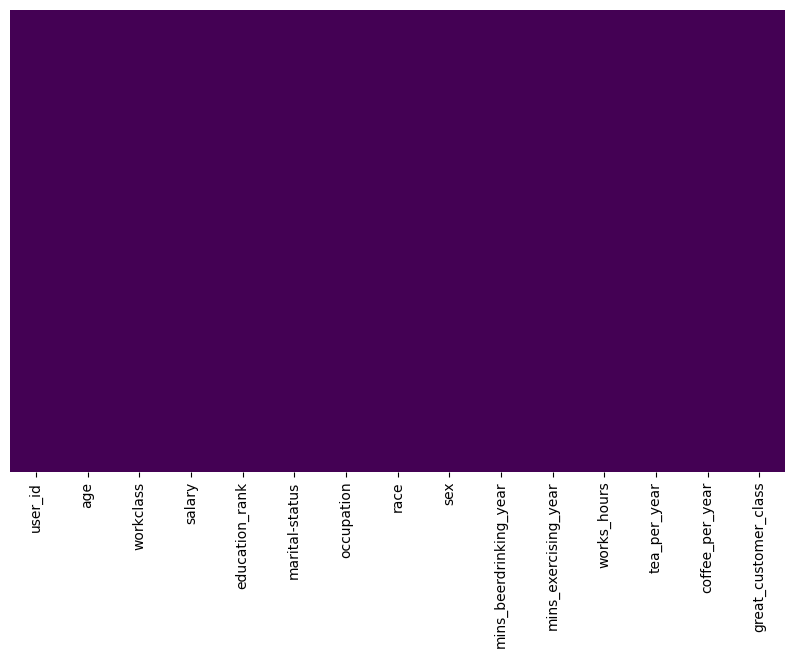

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [8]:
## Feature Selection

In [9]:
dataset_path = df

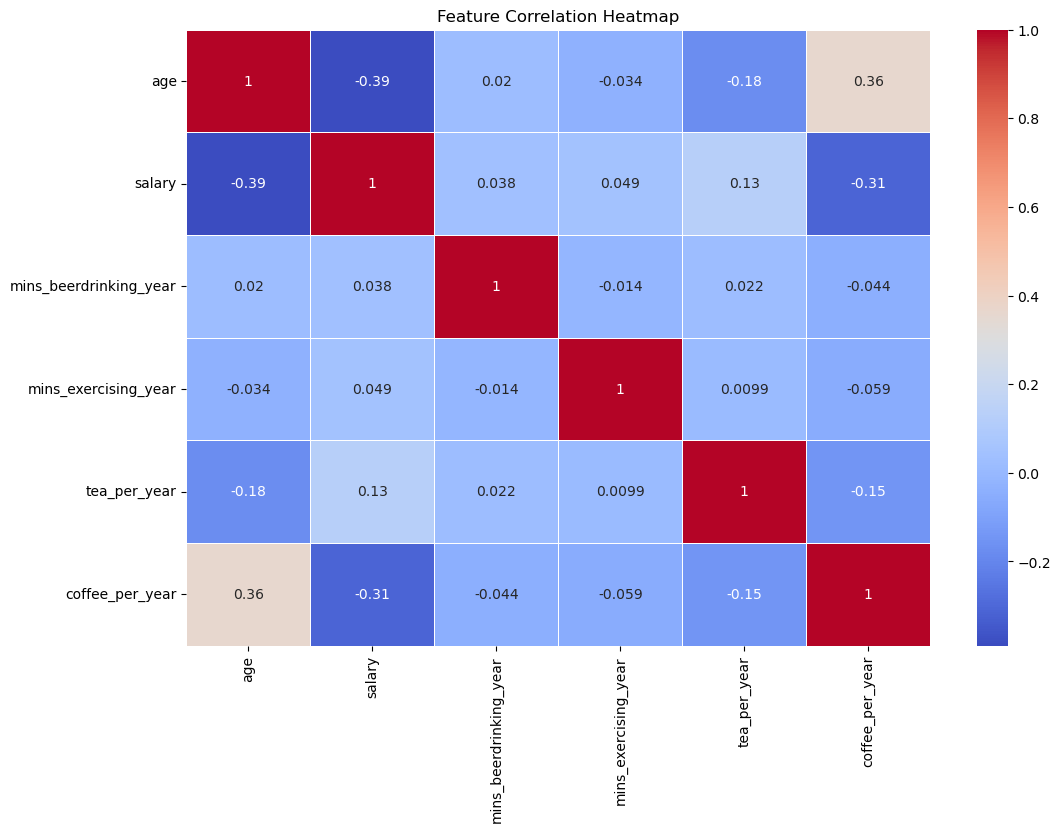

In [10]:
num_cols = ['age', 'salary', 'mins_beerdrinking_year', 'mins_exercising_year', 'tea_per_year', 'coffee_per_year']
correlation_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, LabelEncoder



target = 'great_customer_class'
X = df.drop(columns=[target, 'user_id']) 
y = df[target].astype(int)  

# Encode categorical variables
X = pd.get_dummies(X)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pearson Correlation
cor_selector = X.corrwith(y).abs().sort_values(ascending=False).index[:10]

# Chi-Square
chi2_selector = SelectKBest(chi2, k=10).fit(X, y)
chi2_selected_features = X.columns[chi2_selector.get_support()]

# Recursive Feature Elimination (RFE)
rfe = RFE(LogisticRegression(solver='liblinear'), n_features_to_select=10)
rfe.fit(X, y)
rfe_selected_features = X.columns[rfe.support_]

# Logistic Regression (Embedded Method)
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X, y)
log_reg_selected_features = X.columns[np.argsort(abs(log_reg.coef_)).flatten()][-10:]

# Random Forest (Embedded Method)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)
rf_selected_features = X.columns[np.argsort(rf.feature_importances_)][-10:]

# LightGBM (Embedded Method)
lgbm = lgb.LGBMClassifier()
lgbm.fit(X, y)
lgbm_selected_features = X.columns[np.argsort(lgbm.feature_importances_)][-10:]

# Combine results from all methods
feature_lists = [cor_selector, chi2_selected_features, rfe_selected_features, 
                 log_reg_selected_features, rf_selected_features, lgbm_selected_features]

# Voting mechanism
from collections import Counter

all_selected_features = [feature for sublist in feature_lists for feature in sublist]
feature_votes = Counter(all_selected_features)

# Select top features based on highest votes
top_features = [feature for feature, votes in feature_votes.most_common(7)]

print("Top selected features:", top_features)


[LightGBM] [Info] Number of positive: 1168, number of negative: 12431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 13599, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085889 -> initscore=-2.364900
[LightGBM] [Info] Start training from score -2.364900
Top selected features: ['marital-status_Married', 'occupation_executive', 'mins_beerdrinking_year', 'occupation_professional', 'works_hours', 'mins_exercising_year', 'coffee_per_year']


In [22]:
print("Top selected features:", list(top_features))


Top selected features: ['marital-status_Married', 'occupation_executive', 'mins_beerdrinking_year', 'occupation_professional', 'works_hours', 'mins_exercising_year', 'coffee_per_year']


In [29]:

available_features = [feature for feature in top_features if feature in X.columns]

# new DataFrame with user_id, target, and selected features
df_selected_features = pd.concat([df[['user_id', target]], X[available_features]], axis=1)

print(df_selected_features.head())


   user_id  great_customer_class  marital-status_Married  \
0  1004889                     0                       0   
1  1012811                     0                       0   
2  1006870                     0                       0   
3  1022149                     0                       0   
4  1029558                     0                       0   

   occupation_executive  mins_beerdrinking_year  occupation_professional  \
0                     0                     0.0                        0   
1                     0                     0.0                        0   
2                     0                     0.0                        0   
3                     0                     0.0                        0   
4                     0                     0.0                        0   

   works_hours  mins_exercising_year  coffee_per_year  \
0           40                   0.0            447.0   
1           30                   0.0            447.0   
2          

In [ ]:
## Models

In [31]:

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


target = 'great_customer_class'


X = df[selected_features]
y = df[target].astype(int) 

# Encode categorical variables
X = pd.get_dummies(X)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear'),
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Random Forest Performance:
Accuracy: 0.9183823529411764
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2476
           1       0.60      0.28      0.38       244

    accuracy                           0.92      2720
   macro avg       0.76      0.63      0.67      2720
weighted avg       0.90      0.92      0.90      2720


SVM Performance:
Accuracy: 0.9235294117647059
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2476
           1       0.88      0.17      0.29       244

    accuracy                           0.92      2720
   macro avg       0.90      0.58      0.62      2720
weighted avg       0.92      0.92      0.90      2720


Logistic Regression Performance:
Accuracy: 0.9209558823529411
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2476
           1       0.70      0.21      0.32       244

    accuracy   

In [32]:
## Ensemble

In [34]:
# Ensemble Learning - Stacking
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('svm', SVC(kernel='linear', probability=True)),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)

print("\nStacking Ensemble Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))


Stacking Ensemble Performance:
Accuracy: 0.9286764705882353
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2476
           1       0.86      0.25      0.38       244

    accuracy                           0.93      2720
   macro avg       0.89      0.62      0.67      2720
weighted avg       0.92      0.93      0.91      2720



In [35]:
##The ensemble accuracy is pretty much the same as the accuracy of the models, it may have improved on the whole but not in terms of numbers


In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9205882352941176


In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[2449   27]
 [ 189   55]]


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2476
           1       0.67      0.23      0.34       244

    accuracy                           0.92      2720
   macro avg       0.80      0.61      0.65      2720
weighted avg       0.91      0.92      0.90      2720



In [ ]:
#If you are askign the correct metric, i would go with the F1 score.